Random Forest Regressor Error Rates. Train: 0.32334906531822954 +  Test: 2.0157192253468765
Neural Network Regressor Error Rates. Train: 1.5289571290072563 +  Test: 1.6257348916300156
Support Vector Machine Error Rates. Train: 9.271541598291021 +  Test: 9.29789335430846


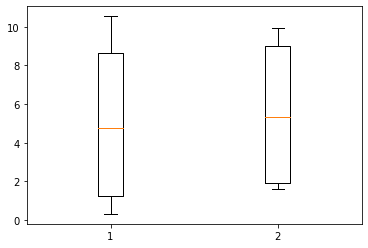

In [1]:
#Import required modules
import pandas as pandas
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split

# LOAD ENB2012 for part 1, Modules.txt for Part 2
#Part 1.1 Data Prep
data = pandas.read_excel("ENB2012_data.xls")
#print(data)
# Extract the inputs.
inputs = data.values[:,:].astype(float)
#Split X and Y Values
xValues = np.zeros([768, 8])
yValues = np.zeros([768, 2])
#print(inputs)
for j in range(768):
    for i in range(10):
        if i < 8:
            xValues[j,i] = inputs[j,i]
        else:
            yValues[j,i-8] = inputs[j,i]
#Test values            
#print(xValues[0,0])
#print(yValues[0,0])
    
#Normalise the input values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(xValues)
#Split into Training and Test Data
x_Train, x_Test, y_Train, y_Test = train_test_split(scaled, yValues, test_size = 0.5, random_state = 50, shuffle = True)


#Part 1.2 Regression
#Import required modules
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#Each of these regressors must be used
#Try to reduce repetition using functions where possible

#Random Forest (sklearn.ensemble.RandomForestRegressor)
rFRegressor = RandomForestRegressor()
rFRegressor.fit(x_Train, y_Train)
rFRTrain = rFRegressor.predict(x_Train)
rFRTest = rFRegressor.predict(x_Test)


#Neural Network (sklearn.neural_network.MLPRegressor)
MLPRegressor = MLPRegressor(max_iter = 10000)
MLPRegressor.fit(x_Train, y_Train)
MLPTrain = MLPRegressor.predict(x_Train)
MLPTest = MLPRegressor.predict(x_Test)


#Support Vector Machine (sklearn.svm.SVR) Use multiple

#yValues1D = yValues.flatten()
#yVal1,yVal2=np.split(yValues,2,axis=1)
#yVal1 = yVal1.ravel()
#yVal2 = yVal2.ravel()
#regressor3 = SVR()
#regressor3.fit(scaled, yVal1)
#regressor4 = SVR()
#regressor4.fit(scaled, yVal2)
#outputs3 = regressor3.predict(scaled)
#outputs4 = regressor4.predict(scaled)
#finalOutput = np.concatenate((outputs3, outputs4))

y_Train1,y_Train2=np.split(y_Train,2,axis=1)
y_Test1,y_Test2=np.split(y_Test,2,axis=1)

y_Train1 = y_Train1.ravel()
y_Test1 = y_Test1.ravel()
y_Train2 = y_Train2.ravel()
y_Test2 = y_Test2.ravel()

SVRRegressor1 = SVR()
SVRRegressor1.fit(x_Train, y_Train1)
SVRTrain1 = SVRRegressor1.predict(x_Train)
SVRTest1 = SVRRegressor1.predict(x_Test)

SVRRegressor2 = SVR()
SVRRegressor2.fit(x_Train, y_Train2)
SVRTrain2 = SVRRegressor2.predict(x_Train)
SVRTest2 = SVRRegressor2.predict(x_Test)


#Part 1.3  Regression Assessment

#ALL of the regressors need to assessed to determine their mean square error rate
#Cross validation needs to be used
#Results should be presented with a box plot

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

RFTrainErrorRate = mean_squared_error(y_Train,rFRTrain)
RFTestErrorRate = mean_squared_error(y_Test,rFRTest)
print(f"Random Forest Regressor Error Rates. Train: {RFTrainErrorRate} +  Test: {RFTestErrorRate}")
MLPTrainErrorRate = mean_squared_error(y_Train,MLPTrain)
MLPTestErrorRate = mean_squared_error(y_Test,MLPTest)
print(f"Neural Network Regressor Error Rates. Train: {MLPTrainErrorRate} +  Test: {MLPTestErrorRate}")
SVRTrainErrorRate1 =  mean_squared_error(y_Train1,SVRTrain1)
SVRTestErrorRate1 = mean_squared_error(y_Test1,SVRTest1)

SVRTrainErrorRate2 = mean_squared_error(y_Train2,SVRTrain2)
SVRTestErrorRate2 = mean_squared_error(y_Test2,SVRTest2)

SVRMeanTrainErrorRate = (SVRTrainErrorRate1 + SVRTrainErrorRate2) / 2
SVRMeanTestErrorRate = (SVRTestErrorRate1 + SVRTestErrorRate2) / 2
print(f"Support Vector Machine Error Rates. Train: {SVRMeanTrainErrorRate} +  Test: {SVRMeanTestErrorRate}")
#Put MSE rates into box plots
boxplotDataTrain = [RFTrainErrorRate,MLPTrainErrorRate,SVRTrainErrorRate1,SVRTrainErrorRate2]
boxplotDataTest = [RFTestErrorRate,MLPTestErrorRate,SVRTestErrorRate1,SVRTestErrorRate2]
boxplotData = [boxplotDataTrain,boxplotDataTest]
plt.subplots()
boxplot = plt.boxplot(boxplotData)
